## Heart Dissease Project

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve,roc_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [110]:
import warnings
warnings.filterwarnings('ignore')

Data Dictionary:

-age. The age of the patient.

-sex. The gender of the patient. (1 = male, 0 = female).

-cp. Type of chest pain. (1 = typical angina, 2 = atypical angina, 3 = non — anginal pain, 4 = asymptotic).

-trestbps. Resting blood pressure in mmHg.

-chol. Serum Cholestero in mg/dl.

-fbs. Fasting Blood Sugar. (1 = fasting blood sugar is more than 120mg/dl, 0 = otherwise).

-restecg. Resting ElectroCardioGraphic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hyperthrophy).

-thalach. Max heart rate achieved.

-exang. Exercise induced angina (1 = yes, 0 = no).

-oldpeak. ST depression induced by exercise relative to rest.

-slope. Peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping).

-ca. Number of major vessels (0–3) colored by flourosopy.

-thal. Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect).

-target. Heart Disease(1-present, 0-absent)

## Data Analysis

In [4]:
heart_disease_df=pd.read_csv("heart-disease.csv")
heart_disease_df.shape

(303, 14)

In [5]:
heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
heart_disease_df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [9]:
heart_disease_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

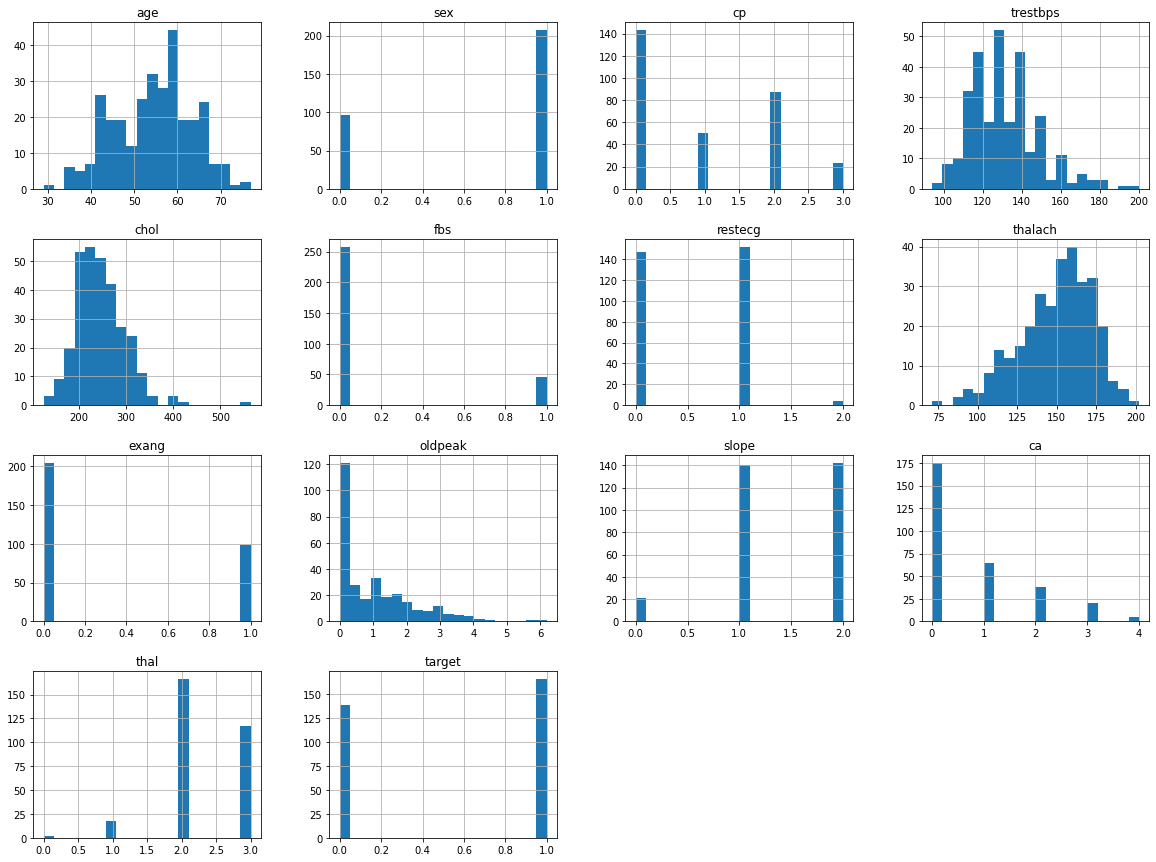

In [22]:
heart_disease_df.hist(bins=20,figsize=(20,15));

In [23]:
heart_disease_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [26]:
heart_disease_df["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

In [28]:
heart_disease_df["fbs"].unique()

array([1, 0], dtype=int64)

In [31]:
heart_disease_df["restecg"].unique()

array([0, 1, 2], dtype=int64)

In [32]:
heart_disease_df["exang"].unique()

array([0, 1], dtype=int64)

In [34]:
heart_disease_df["slope"].unique()

array([0, 2, 1], dtype=int64)

In [35]:
heart_disease_df["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [36]:
heart_disease_df["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

In [38]:
pd.crosstab(heart_disease_df.target,heart_disease_df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [59]:
mean_data=pd.DataFrame(heart_disease_df[heart_disease_df["target"]==0].mean())

In [61]:
mean_data["1"]=heart_disease_df[heart_disease_df["target"]==1].mean()

In [62]:
mean_data

,0,1
age,56.601449,52.496970
sex,0.826087,0.563636
cp,0.478261,1.375758
trestbps,134.398551,129.303030
chol,251.086957,242.230303
fbs,0.159420,0.139394
restecg,0.449275,0.593939
thalach,139.101449,158.466667
exang,0.550725,0.139394
oldpeak,1.585507,0.583030


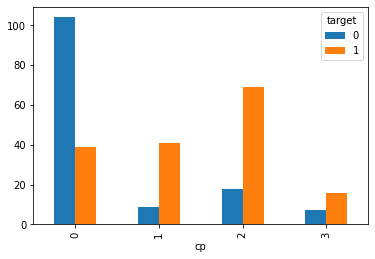

In [69]:
pd.crosstab(heart_disease_df.cp,heart_disease_df.target).plot(kind="bar");

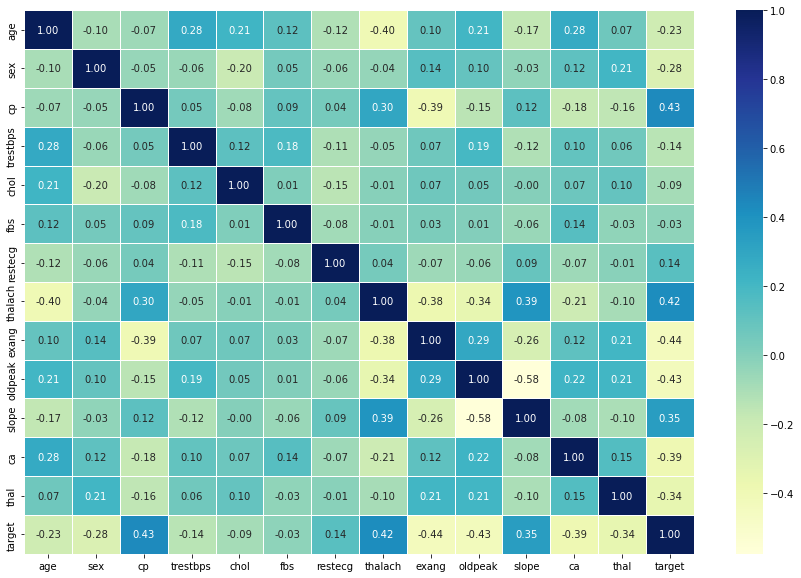

In [71]:
corr_matrix=heart_disease_df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="YlGnBu")

## Machine Learning

In [72]:
X=heart_disease_df.drop("target",axis=1)
y=heart_disease_df["target"]

In [74]:
np.random.seed(69)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [94]:
models_dict={"Linear_SVC": LinearSVC(),
            "KNeighborsClassifier": KNeighborsClassifier(),
            "SVC": SVC(),
            "RandomForestClassifier": RandomForestClassifier(),
             "LogisticRegression": LogisticRegression(),
            "AdaBoost":AdaBoostClassifier(),
            "GradientBoosting":GradientBoostingClassifier()}

In [113]:
def fit_and_score_models(models,X_train,y_train,X_test,y_test):
    """
    Fits and evaluates a machine learning model using sklearn's .fit() and .score() functions.
    models=dictionary of model names and model functions(according to sklearn's standard nomenclature)
    X_train=Pandas DataFrame used for fitting the model(given variables)
    y_train=Pandas DataFrame used for fitting the model(target)
    X_test=Pandas DataFrame used for evaluating the model
    y_test=Pandas DataFrame used for evaluating the model
    """
    results={}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        results[model_name] = model.score(X_test, y_test)
    return results

In [114]:
results=fit_and_score_models(models_dict,X_train,y_train,X_test,y_test)
results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1],reverse=1)}
print("3 Most Promising Models:\n",list(results.items())[0],"\n",list(results.items())[1],"\n",list(results.items())[2])

3 Most Promising Models:
 ('LogisticRegression', 0.8852459016393442) 
 ('Linear_SVC', 0.8688524590163934) 
 ('RandomForestClassifier', 0.8688524590163934)


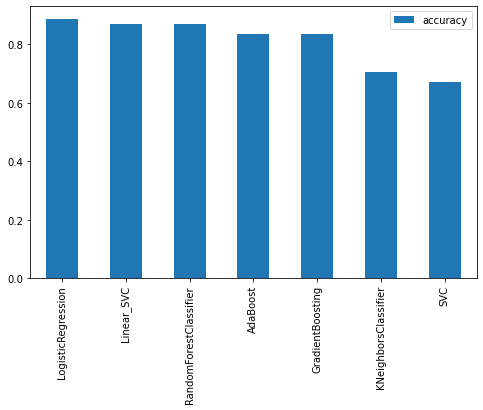

In [142]:
results_df=pd.DataFrame.from_dict(results, orient='index',columns=['accuracy'])
results_df.plot.bar(figsize=(8,5));

## Tuning Hyperparameters for Logistic Regression

In [147]:
log_reg_grid = {"C": np.logspace(-4,3.5,5,10,20),"solver": ['liblinear'],"penalty":["none","l1","l2","elasticnet"]}

In [148]:
rs_log_reg = GridSearchCV(estimator=LogisticRegression(),
                                param_grid=log_reg_grid,
                                cv=5,
                                verbose=2)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........C=6.25e-06, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .........C=6.25e-06, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .........C=6.25e-06, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .........C=6.25e-06, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .........C=6.25e-06, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...........C=6.25e-06, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...........C=6.25e-06, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...........C=6.25e-06, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...........C=6.25e-06, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...........C=6.25e-06, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...........C=6.25e-06, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...........C=6.25e-06, penalty=l2, sol

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([6.25000000e-06, 1.71914005e-03, 4.72870805e-01, 1.30068983e+02,
       3.57770876e+04]),
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear']},
             verbose=2)

In [149]:
rs_log_reg.best_params_

{'C': 0.4728708045015879, 'penalty': 'l2', 'solver': 'liblinear'}

In [150]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

## Tuning Hyperparameters for RandomForestClassifier

In [154]:
rs_rfc_grid={"n_estimators":[5,10,100,200,500,1000],"criterion":["gini", "entropy", "log_loss"],"max_depth":[None,2,5,10,30,100,1000],"min_samples_split":[1,2,3,5,10],"min_samples_leaf":[1,2,3]}

In [155]:
rs_rfc_clf = GridSearchCV(estimator=RandomForestClassifier(),
                                param_grid=rs_rfc_grid,
                                cv=5,
                                verbose=2)
rs_rfc_clf.fit(X_train,y_train)

Fitting 5 folds for each of 1890 candidates, totalling 9450 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=1, n_estimators=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=1, n_estimators=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=1, n_estimators=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=1, n_estimators=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=1, n_estimators=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=1, n_estimators=10; total time=   0

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 2, 5, 10, 30, 100, 1000],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3, 5, 10],
                         'n_estimators': [5, 10, 100, 200, 500, 1000]},
             verbose=2)

In [156]:
rs_rfc_clf.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 100}

In [157]:
rs_rfc_clf.score(X_test,y_test)

0.8852459016393442

## Evalution of Logistic Regression Model

In [160]:
clf=LogisticRegression(C=0.4728708045015879, penalty='l2', solver='liblinear')

In [162]:
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8852459016393442

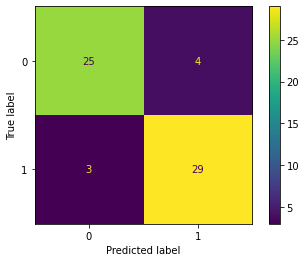

In [165]:
y_preds=clf.predict(X_test)
clf_matrix=confusion_matrix(y_true=y_test,y_pred=y_preds)
display_matrix=ConfusionMatrixDisplay(confusion_matrix=clf_matrix,display_labels=clf.classes_)
display_matrix.plot();

In [168]:
print(classification_report(y_true=y_test,y_pred=y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [169]:
precision_score(y_test,y_preds)

0.8787878787878788

In [170]:
recall_score(y_test,y_preds)

0.90625

In [171]:
f1_score(y_test,y_preds)

0.8923076923076922

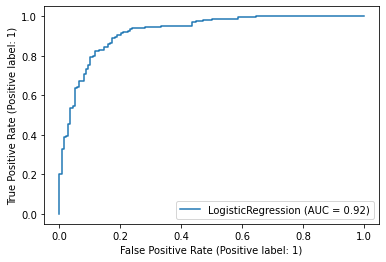

In [172]:
plot_roc_curve(clf,X,y);

In [173]:
cross_val_score(clf, 
                X, 
                y, 
                scoring="accuracy",
                cv=5)

array([0.81967213, 0.86885246, 0.86885246, 0.86666667, 0.75      ])

In [174]:
cross_val_acc = np.mean(cross_val_score(clf,
                                        X,
                                        y,
                                        scoring="accuracy",
                                        cv=5))

cross_val_acc

0.8348087431693989

In [175]:
cross_val_precision=np.mean(cross_val_score(clf,X,y,scoring="precision",cv=5))
cross_val_precision

0.8147537147537147

In [176]:
cross_val_recall=np.mean(cross_val_score(clf,X,y,scoring="recall",cv=5))
cross_val_recall

0.9090909090909092

In [177]:
cross_val_F1=np.mean(cross_val_score(clf,X,y,scoring="f1",cv=5))
cross_val_F1

0.8581381444233983

## Evaluation of Random Forest Classifier

In [179]:
clf2=RandomForestClassifier(criterion='entropy',
 max_depth=2,
 min_samples_leaf=1,
 min_samples_split=3,
 n_estimators=100)
clf2.fit(X_train,y_train)
clf2.score(X_test,y_test)

0.8852459016393442

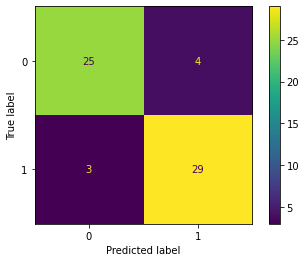

In [180]:
y_preds=clf2.predict(X_test)
clf_matrix=confusion_matrix(y_true=y_test,y_pred=y_preds)
display_matrix=ConfusionMatrixDisplay(confusion_matrix=clf_matrix,display_labels=clf2.classes_)
display_matrix.plot();

In [181]:
print(classification_report(y_true=y_test,y_pred=y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [182]:
precision_score(y_test,y_preds)

0.8787878787878788

In [183]:
recall_score(y_test,y_preds)

0.90625

In [184]:
f1_score(y_test,y_preds)

0.8923076923076922

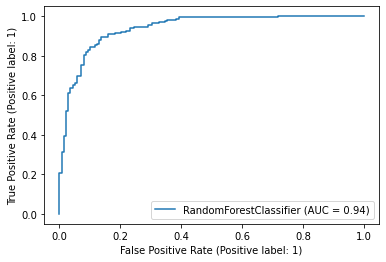

In [189]:
plot_roc_curve(clf2,X,y);

In [190]:
cross_val_score(clf2, 
                X, 
                y, 
                scoring="accuracy",
                cv=5)

array([0.83606557, 0.86885246, 0.80327869, 0.85      , 0.73333333])

In [191]:
cross_val_acc = np.mean(cross_val_score(clf2,
                                        X,
                                        y,
                                        scoring="accuracy",
                                        cv=5))

cross_val_acc

0.8481420765027323

In [192]:
cross_val_precision=np.mean(cross_val_score(clf2,X,y,scoring="precision",cv=5))
cross_val_precision

0.8082943846101742

In [193]:
cross_val_recall=np.mean(cross_val_score(clf2,X,y,scoring="recall",cv=5))
cross_val_recall

0.8909090909090909

In [194]:
cross_val_F1=np.mean(cross_val_score(clf2,X,y,scoring="f1",cv=5))
cross_val_F1

0.851553413058929

## Remark:
Generally, based on our evaluation both models seem to achieve similar, however thanks to higher F1 and recall and precision score Logistic Regression should be veiwed as the primary candidate for further research

## Finding Feature Importance for Logistic Regression

In [197]:
feature_dict=dict(zip(heart_disease_df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.01082390535294673,
 'sex': -1.1829371311700025,
 'cp': 0.7694195637211978,
 'trestbps': -0.01705476130742522,
 'chol': -0.0030414998953278236,
 'fbs': -0.0053540550925761515,
 'restecg': 0.43332147094319234,
 'thalach': 0.02933646201932729,
 'exang': -0.596221137960197,
 'oldpeak': -0.5450718955296224,
 'slope': 0.40731666062076666,
 'ca': -0.7127179028492086,
 'thal': -0.6704043027974851}

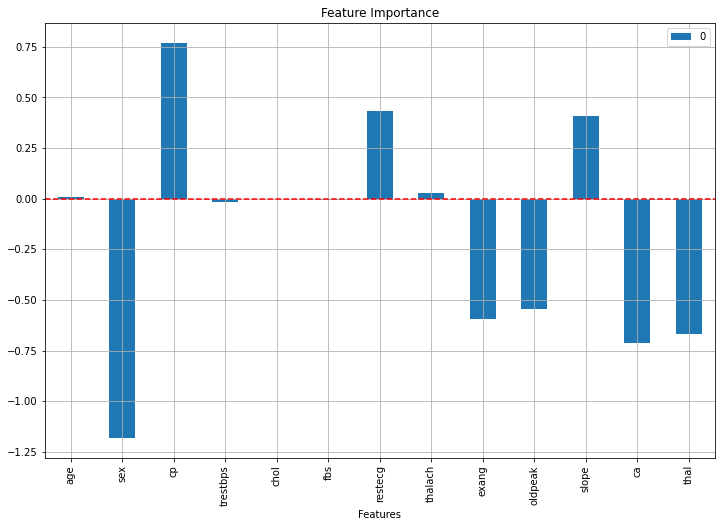

In [208]:
results_df=pd.DataFrame.from_dict(feature_dict, orient='index')
ax=results_df.plot.bar(figsize=(12,8));
ax.axhline(y=0,linestyle="--",color='r');
ax.grid();
ax.set(title="Feature Importance",xlabel="Features");